# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras as k
from keras.models import Sequential
from keras.layers import Dense

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [2]:
from sklearn import datasets

df = datasets.load_iris()

dataframe = pd.DataFrame(data= np.c_[df['data'], df['target']],
                     columns= df['feature_names'] + ['target'])

dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.
    

In [3]:
X = dataframe.drop('target', axis=1)
y = dataframe['target']

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=42)





 ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    

In [4]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    

In [6]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2)


Epoch 1/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.2981 - loss: 1.2527 - val_accuracy: 0.7500 - val_loss: 0.9327
Epoch 2/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.4067 - loss: 1.0584 - val_accuracy: 0.7500 - val_loss: 0.8793
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.4631 - loss: 1.0290 - val_accuracy: 0.7500 - val_loss: 0.8648
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.3998 - loss: 0.9783 - val_accuracy: 0.7083 - val_loss: 0.8166
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.4819 - loss: 0.8809 - val_accuracy: 0.9167 - val_loss: 0.7865
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.7653 - loss: 0.8428 - val_accuracy: 1.0000 - val_loss: 0.7553
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8526 - loss: 0.8596 - val_accuracy: 0.7500 - val_loss: 0.6640
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 0.7633 - loss: 0.7867 - val_accu

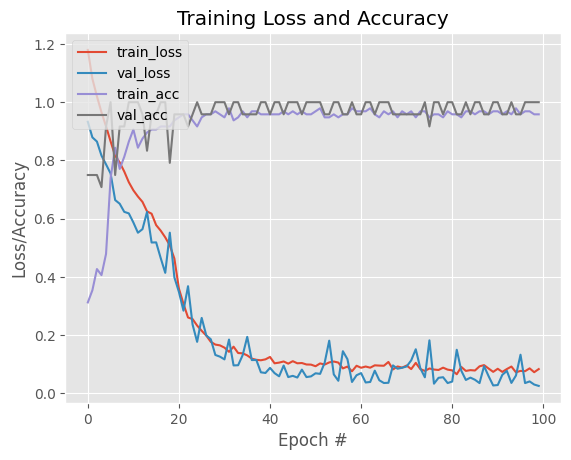

In [7]:
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model.history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model.history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model.history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model.history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()


    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.

In [8]:
model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9667 - loss: 0.0946


[0.09462788701057434, 0.9666666388511658]

## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


## Conclusion
    Summarize what the learner should have gained from this lab, including a better understanding of how ANNs work and how they can be applied to real-world classification problems.
    